In [1]:
import os
import sys
import torch
import math
import numpy as np

# Fix for Graphviz
graphviz_bin_path = r'C:\Program Files\Graphviz\bin'
if graphviz_bin_path not in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + graphviz_bin_path

# Fix for michigrad import
sys.path.append(os.path.abspath('..'))



import michigrad
from michigrad.engine import Value
from michigrad.visualize import show_graph, show_graph_interactive

In [2]:
# --- Functional testing: basic scalar operations ---
a = Value(2, name='a')
b = Value(5, name='b')
c = Value(5, name='c')
f = (a*b)+c
f.name='f'

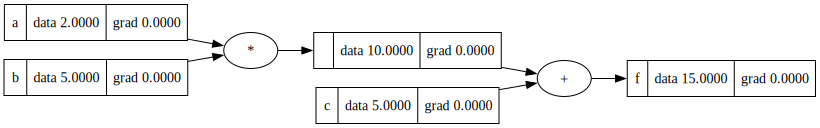

In [3]:
show_graph(f)

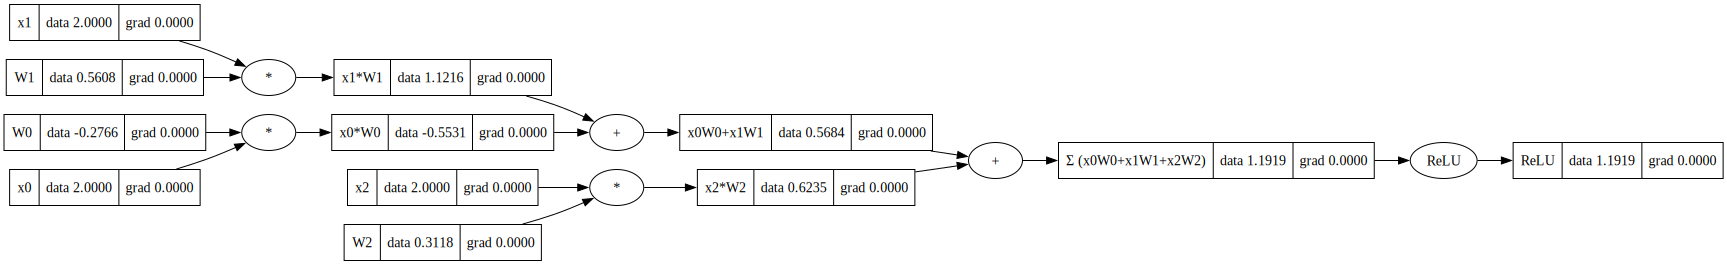

In [4]:
# Single neuron graph
x0 = Value(2, name='x0')
x1 = Value(2, name='x1')
x2 = Value(2, name='x2')

W0 = Value(np.random.randn(), name=f'W0')
W1 = Value(np.random.randn(), name=f'W1')
W2 = Value(np.random.randn(), name=f'W2')

# Computing weighted inputs (products)
x0W0 = x0 * W0
x0W0.name = 'x0*W0'
x1W1 = x1 * W1
x1W1.name = 'x1*W1'
x2W2 = x2 * W2
x2W2.name = 'x2*W2'

# Manual accumulation of the dot product approximation
suma1 = x0W0 + x1W1
suma1.name = 'x0W0+x1W1'
suma2 = suma1 + x2W2
suma2.name = 'Σ (x0W0+x1W1+x2W2)'

# Applying non-linear activation via ReLU
relu = suma2.relu()
relu.name = "ReLU"

# Generating computational graph for architecture 
show_graph(relu)